# Steganografia

In [1]:
import random
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
image = np.array(Image.open("obrazek.jpg"))

In [2]:
def random_data(size):
    characters = 'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'
    random_indices = [random.randint(0, len(characters) - 1) for _ in range(size)]
    return ''.join([characters[i] for i in random_indices])

In [3]:
pixels = image.shape[0] * image.shape[1]
bits = pixels * 3
max_info_size = bits // 8
print(f"Image shape: {image.shape}")
print(f"Image size: {image.shape[0]}x{image.shape[1]}")
print(f"Pixels: {pixels}")
print(f"Bits: {bits}")
print(f"Max info size: {max_info_size}")
data = random_data(max_info_size)


Image shape: (256, 256, 3)
Image size: 256x256
Pixels: 65536
Bits: 196608
Max info size: 24576


In [4]:
def charToBits(c):
    return [int(b) for b in format(ord(c), '08b')]

def numToBits(n):
    return [int(b) for b in format(n, '08b')]

def bitsToChar(b):
    return chr(int(''.join([str(i) for i in b]), 2))

def rgbImageArrayToBits(arr):
    bits = []
    for row in arr:
        for pixel in row:
            for color in pixel:
                bits += numToBits(color)
    return bits

def bitsToRgbImageArray(bits, shape):
    arr = np.zeros(shape, dtype=np.uint8)
    bit_index = 0
    for i in range(shape[0]):
        for j in range(shape[1]):
            for k in range(3):
                arr[i][j][k] = int(''.join([str(b) for b in bits[bit_index:bit_index+8]]), 2)
                bit_index += 8
    return arr

def dataToBits(data):
    bits = []
    for c in data:
        bits += charToBits(c)
    return bits

imageAsBits = rgbImageArrayToBits(image)
dataAsBits = dataToBits(data)


### Wpisanie w obrazek wiadomości

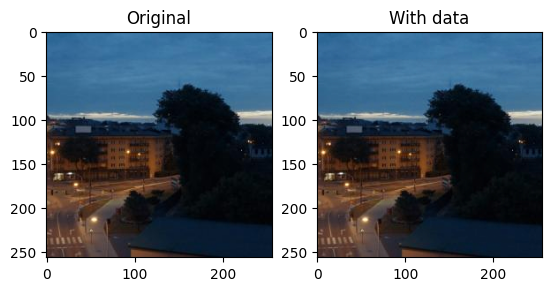

In [8]:
bit_index = 1 # index of the bit in the pixel 
bits_array_result = []

for index in range(len(dataAsBits)):
    color = imageAsBits[index*8:index*8+8]
    color[-bit_index] = dataAsBits[index]
    bits_array_result += color

result_image = bitsToRgbImageArray(bits_array_result, image.shape)
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.title("With data")
plt.imshow(result_image)


### Wyciagniecia z obrazka wiadomości

In [9]:
def getDataFromImage(image, bit_index):
    imageAsBits = rgbImageArrayToBits(image)
    dataAsBits = []
    for i in range(0, len(imageAsBits), 8):
        color = imageAsBits[i:i+8]
        dataAsBits.append(color[-bit_index])
    data = []
    for i in range(0, len(dataAsBits), 8):
        data.append(bitsToChar(dataAsBits[i:i+8]))
    return ''.join(data)

data_from_image = getDataFromImage(result_image, bit_index)
print(data_from_image == data)

True
